In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from operator import itemgetter

/Applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Applications/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

In [3]:
data = open("newdata.txt").readlines()

In [4]:
for i in range(len(data)):
    data[i] = [x.strip() for x in data[i].split('\t')]
    data[i] = list(filter(None, data[i]))

In [5]:
def jaccard_distance(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    
    #Taking jaccard distance as 1- (jaccard  coefficient of two sets of topics)
    return 1-len(s1.intersection(s2)) / len(s1.union(s2)) 

In [6]:
n = len(data)
distance_matrix = [[0 for x in range(0,n)] for y in range(0,n)]
for i in range(0,n):
    for j in range(0,n):
        distance_matrix[i][j] = jaccard_distance(data[i], data[j])

In [7]:
def Clusters(linkages):
    linkages = sorted(linkages,key=itemgetter(1))
    linkages = sorted(linkages,key=itemgetter(0))
#     index =[]
#     for i in range(0,len(linkages)):
#         index.append(linkages[i][0])
#     temp_index = list(set(index))
#     temp_index = sorted(temp_index)
    clusters = [-1 for x in range(0,150)]
    count = 0
    for i in range(0, 150):
        if clusters[i] == -1:
            clusters[i] = count
            flag = 0
        else:
            flag = 1
            temp_val = clusters[i]
        key = 0
        while key < len(linkages):
            if linkages[key][0] == i:
                if flag == 1:
                    clusters[linkages[key][1]] = temp_val
                else:
                    clusters[linkages[key][1]] = count
            key = key + 1
        if flag == 0:
            count = count + 1
    return clusters

# Single Linkage Clusters 

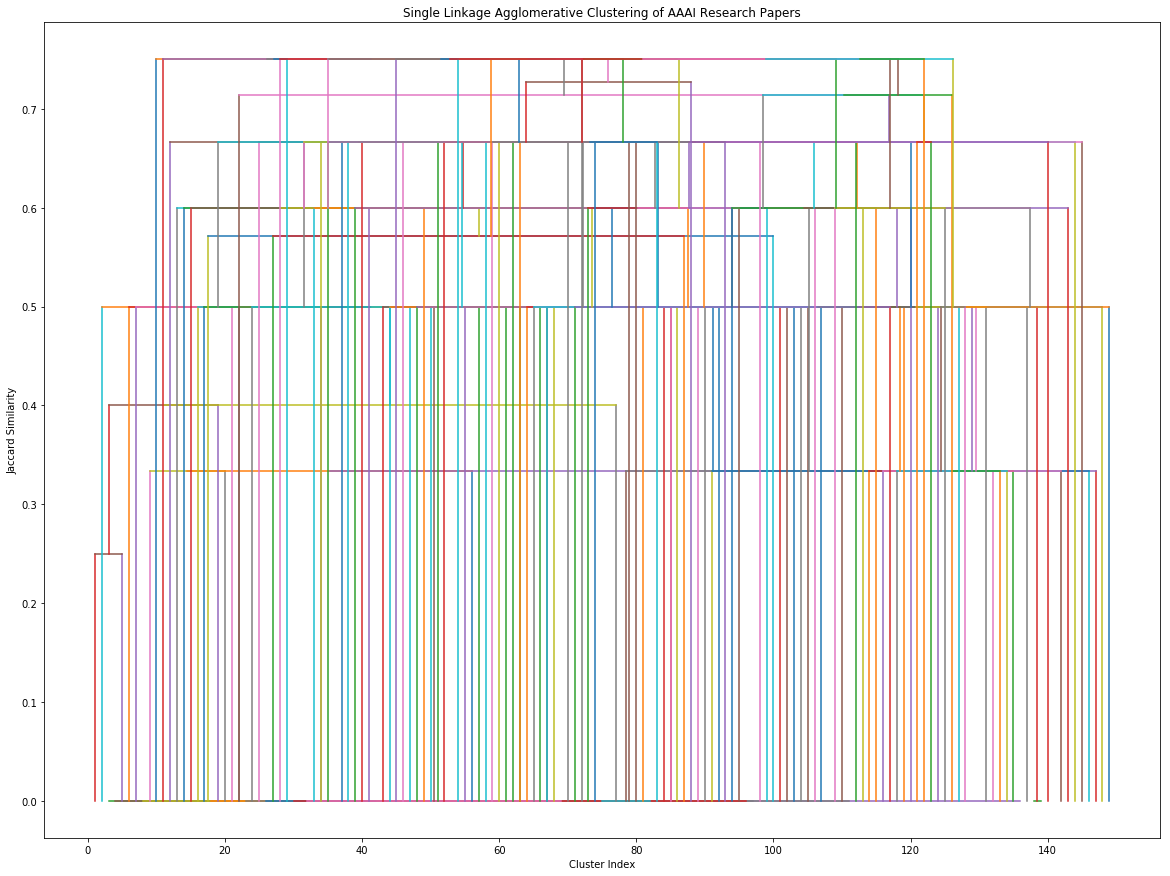

In [8]:
temp = [[0 for x in range(0,n)] for y in range(0,n)]
costs = []
x_axis = []
y_axis = []
plt.title("Single Linkage Agglomerative Clustering of AAAI Research Papers")
plt.xlabel("Cluster Index")
plt.ylabel("Jaccard Similarity")
for i in range(0,n):
    x_axis.append(i+1)
    y_axis.append(0)
for i in range(0,n):
    for j in range(0,n):
        temp[i][j] = distance_matrix[i][j]
linkages = []
for i in range(0,n-9):
    val = 1000000000
    posx = n
    posy = n
    for j in range(0,n):
        for k in range(0,n):
            if k == j:
                continue
            if temp[j][k] == -1:
                continue
            if temp[j][k] < val:
                val = temp[j][k]
                posx = j
                posy = k
    if posx > posy:
        posx,posy = posy,posx
    X = [x_axis[posx],x_axis[posx]]
    Y = [y_axis[posx],val]
    plt.plot(X,Y)
    X = [x_axis[posy],x_axis[posy]]
    Y = [y_axis[posy],val]
    plt.plot(X,Y)
    y_axis[posx]=val
    y_axis[posy]=val
    X = [x_axis[posx],x_axis[posy]]
    Y = [val,val]
    plt.plot(X,Y)
    x_axis[posx] = (x_axis[posx]+x_axis[posy])/2
    tup = (posx,posy)
    linkages.append(tup)
    costs.append(val)
    for j in range(0,n-1):
        val = min(temp[posx][j],temp[posy][j])
        temp[posx][j]=val
        temp[j][posx]=val
    for j in range(0,n-1):
        temp[posy][j] = -1
        temp[j][posy] = -1
plt.show()

### Cluster Matrix for Single Linkage

In [9]:
clusters_single = Clusters(linkages)
np.array(clusters_single)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 8])

### Number of entities in Clusters

In [10]:
for i in range(0,9):
    print("-------------------- CLUSTER -", i+1,"--------------------")
    print("Number of data points in the cluster = ",clusters_single.count(i))
    print("-----------------------------------------------------\n")

-------------------- CLUSTER - 1 --------------------
Number of data points in the cluster =  142
-----------------------------------------------------

-------------------- CLUSTER - 2 --------------------
Number of data points in the cluster =  1
-----------------------------------------------------

-------------------- CLUSTER - 3 --------------------
Number of data points in the cluster =  1
-----------------------------------------------------

-------------------- CLUSTER - 4 --------------------
Number of data points in the cluster =  1
-----------------------------------------------------

-------------------- CLUSTER - 5 --------------------
Number of data points in the cluster =  1
-----------------------------------------------------

-------------------- CLUSTER - 6 --------------------
Number of data points in the cluster =  1
-----------------------------------------------------

-------------------- CLUSTER - 7 --------------------
Number of data points in the cluster =

# Complete Linkage Clusters 

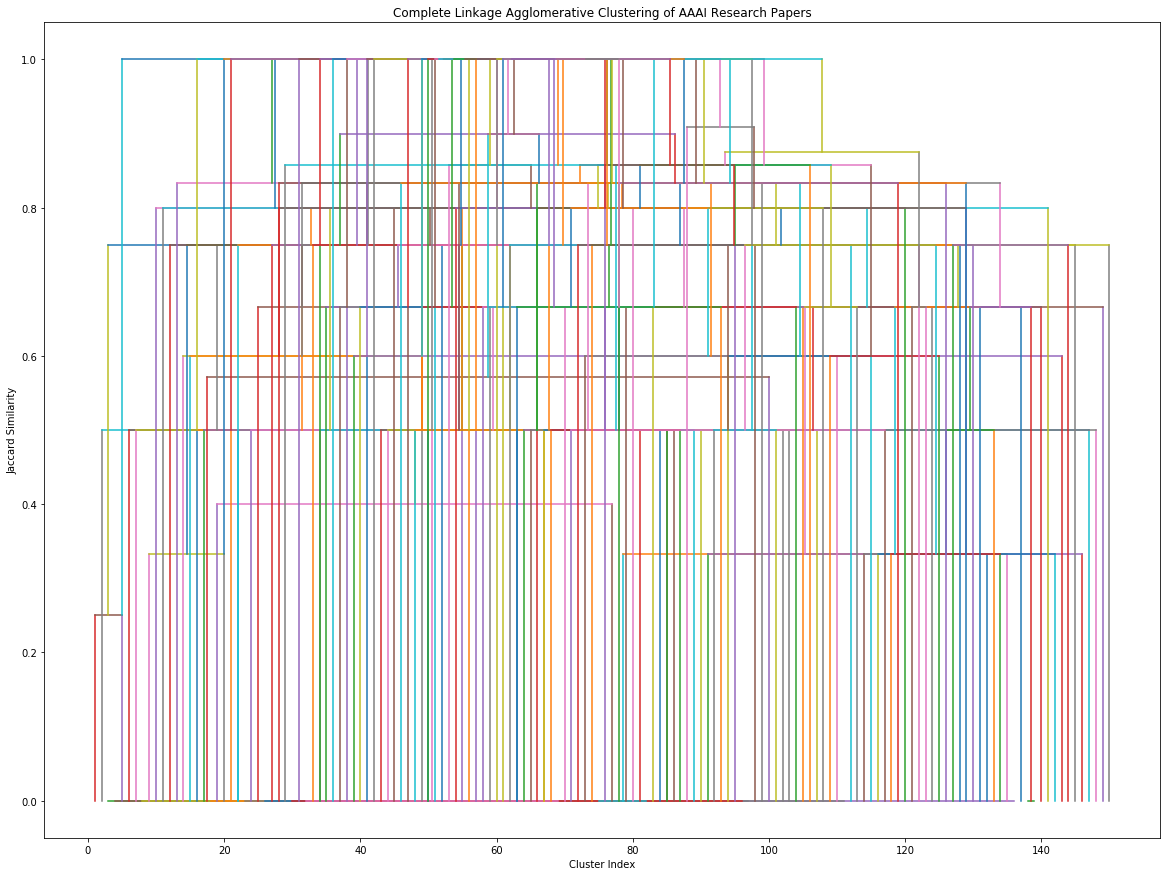

In [11]:
n = len(data)
distance_matrix = [[0 for x in range(0,n)] for y in range(0,n)]
for i in range(0,n):
    for j in range(0,n):
        distance_matrix[i][j] = jaccard_distance(data[i], data[j])
temp = [[0 for x in range(0,n)] for y in range(0,n)]
costs = []
x_axis = []
y_axis = []
plt.title("Complete Linkage Agglomerative Clustering of AAAI Research Papers")
plt.xlabel("Cluster Index")
plt.ylabel("Jaccard Similarity")
for i in range(0,n):
    x_axis.append(i+1)
    y_axis.append(0)
for i in range(0,n):
    for j in range(0,n):
        temp[i][j] = distance_matrix[i][j]
linkages_complete = []
for i in range(0,n+16):
    val = 1000000000
    posx = n
    posy = n
    for j in range(0,n):
        for k in range(0,n):
            if k == j:
                continue
            if temp[j][k] == -1:
                continue
            if temp[j][k] < val:
                val = temp[j][k]
                posx = j
                posy = k
    if posx > posy:
        posx,posy = posy,posx
    X = [x_axis[posx],x_axis[posx]]
    Y = [y_axis[posx],val]
    plt.plot(X,Y)
    X = [x_axis[posy],x_axis[posy]]
    Y = [y_axis[posy],val]
    plt.plot(X,Y)
    y_axis[posx]=val
    y_axis[posy]=val
    X = [x_axis[posx],x_axis[posy]]
    Y = [val,val]
    plt.plot(X,Y)
    x_axis[posx] = (x_axis[posx]+x_axis[posy])/2
    tup = (posx,posy)
    linkages_complete.append(tup)
    costs.append(val)
    for j in range(0,n-1):
        val = max(temp[posx][j],temp[posy][j])
        temp[posx][j]=val
        temp[j][posx]=val
    for j in range(0,n-1):
        temp[posy][j] = -1
        temp[j][posy] = -1
plt.show()

In [12]:
clusters_complete = Clusters(linkages_complete)
np.array(clusters_complete)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 6, 0,
       0, 0, 0, 7, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 6, 0, 8, 7, 0, 0, 4, 0,
       0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 8, 5, 4, 0, 0, 0, 0])

### Number of entities in Clusters

In [13]:
for i in range(0,9):
    print("-------------------- CLUSTER -", i+1,"--------------------")
    print("Number of data points in the cluster = ",clusters_complete.count(i))
    print("-----------------------------------------------------\n")

-------------------- CLUSTER - 1 --------------------
Number of data points in the cluster =  130
-----------------------------------------------------

-------------------- CLUSTER - 2 --------------------
Number of data points in the cluster =  2
-----------------------------------------------------

-------------------- CLUSTER - 3 --------------------
Number of data points in the cluster =  3
-----------------------------------------------------

-------------------- CLUSTER - 4 --------------------
Number of data points in the cluster =  2
-----------------------------------------------------

-------------------- CLUSTER - 5 --------------------
Number of data points in the cluster =  3
-----------------------------------------------------

-------------------- CLUSTER - 6 --------------------
Number of data points in the cluster =  3
-----------------------------------------------------

-------------------- CLUSTER - 7 --------------------
Number of data points in the cluster =